In [1]:
import pandas as pd
import torch.nn as nn
from tbnn.training_utils import early_stopped_tbnn_training_run
import torch
import matplotlib.pyplot as plt
import pickle
import torch.nn as nn
import tbnn.models as models
import tbnn.devices as devices
import tbnn.dataloaders as dataloaders
import tbnn.losses as losses
device = devices.get_device()



In [2]:
dataset_params = {'file': '/home/ryley/WDK/ML/dataset/komegasst_fp_phll_duct.csv',
                  'test_set': ['case_1p2'],
                }

df = pd.read_csv(dataset_params['file'])

df = df[df['Case'].isin(['case_1p2'])]
print(df['komegasst_T1_23'])
df_test = df#df[df['Case'].isin(dataset_params['test_set'])]
df_tv = df[df['komegasst_q2']>0.01]
df_tv = df_tv[df_tv['komegasst_C_2']<2.7]
df_tv = df_tv[df_tv['komegasst_C_2']>2.2]

print(f'Dataset: {len(df)}, test: {len(df_test)}, tv: {len(df_tv)}')



45649   -4.772180e-27
45650    3.849380e-23
45651    1.465240e-24
45652   -1.817660e-24
45653   -1.741260e-24
             ...     
60395   -7.720850e-20
60396    4.942020e-20
60397    2.847330e-20
60398    1.791410e-21
60399    6.991570e-25
Name: komegasst_T1_23, Length: 14751, dtype: float64
Dataset: 14751, test: 14751, tv: 2054


Training points: 2054, validation points 2054
EPOCH    LR        TRAIN     VALID         MSE:T/V              RL:T/V         %NR_t/%NR_v
  1   4.000e-04   0.00498   0.00498   0.00498 / 0.00498   0.00000 / 0.00000   0.00% / 0.00%
 10   4.000e-04   0.00336   0.00336   0.00336 / 0.00336   0.00000 / 0.00000   0.00% / 0.00%
 20   4.000e-04   0.00245   0.00245   0.00245 / 0.00245   0.00000 / 0.00000   0.00% / 0.00%
 30   4.000e-04   0.00216   0.00216   0.00216 / 0.00216   0.00000 / 0.00000   0.10% / 0.10%
 40   4.000e-04   0.00202   0.00202   0.00202 / 0.00202   0.00000 / 0.00000   0.05% / 0.05%
 50   4.000e-04   0.00190   0.00190   0.00190 / 0.00190   0.00000 / 0.00000   0.10% / 0.10%
 60   4.000e-04   0.00187   0.00187   0.00187 / 0.00187   0.00000 / 0.00000   0.19% / 0.19%
 70   4.000e-04   0.00185   0.00185   0.00185 / 0.00185   0.00000 / 0.00000   0.15% / 0.15%
 80   4.000e-04   0.00183   0.00183   0.00183 / 0.00183   0.00000 / 0.00000   0.24% / 0.24%
 90   4.000e-04   0.00182   0.00182

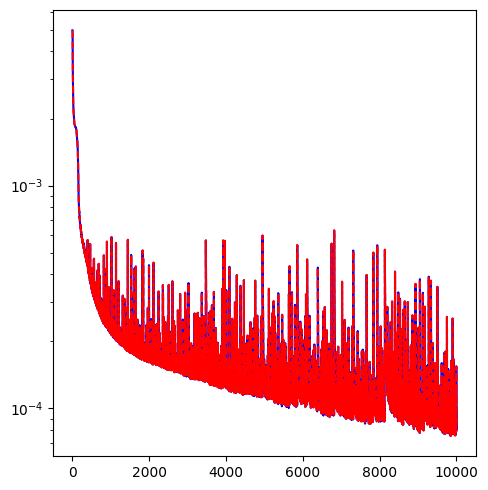

In [21]:
training_params = {'early_stopping_patience': 2000,
                    'max_epochs': 10000,
                      'learning_rate': 0.0004,
                        'learning_rate_decay': 1.0,
                          'batch_size': 128,
                            'val_set': ['case_1p2']}

model_params = {'neurons': 20, 'n_hidden': 11, 'activation_function': nn.ReLU(),                 
                #'input_features': ['komegasst_q6','komegasst_q5','komegasst_I1_1','komegasst_I1_3','komegasst_I2_3','komegasst_I1_5']
                'input_features':['komegasst_I1_1','komegasst_I2_1',
                                  'komegasst_I2_2',
                                  'komegasst_I1_3','komegasst_I2_3',
                                  'komegasst_I1_4','komegasst_I1_5',
                                  'komegasst_I2_4','komegasst_I2_5',
                                  'komegasst_I2_6',
                                  'komegasst_I1_7','komegasst_I2_7',
                                  'komegasst_I2_8',
                                  'komegasst_I1_9',
                                  'komegasst_I1_12',
                                  'komegasst_I1_13',
                                  'komegasst_I1_16',
                                  'komegasst_I2_16',
                                  'komegasst_I1_21',
                                  'komegasst_I1_25',
                                  'komegasst_I1_29',
                                  'komegasst_q5',
                                  'komegasst_q2',
                                  'komegasst_q6',
                                  'komegasst_q1',
                                  'komegasst_q3',
                                  'komegasst_q7',
                                  'komegasst_q8',
                                  'komegasst_q9',
                                  #'komegasst_C_1',
                                  #'komegasst_C_2'

#'komegasst_I1_5',
#'komegasst_I1_3',
#'komegasst_I1_4',
#'komegasst_I1_5',
#'komegasst_I1_16',
#'komegasst_I1_7',
#'komegasst_I1_9',
#'komegasst_I1_10',
#'komegasst_I1_12',
#'komegasst_I1_13',
#'komegasst_I1_16',
#'komegasst_q5',
#'komegasst_q6',
]
}

model = models.TBNNPerpPlus(N = 10,
                input_dim = len(model_params['input_features']),
                n_hidden = model_params['n_hidden'],
                neurons = model_params['neurons'],
                activation_function = model_params['activation_function'],
                input_feature_names=model_params['input_features']
            ).to(device)
"""
model = models.TBNN(N = 10,
                input_dim = len(model_params['input_features']),
                n_hidden = model_params['n_hidden'],
                neurons = model_params['neurons'],
                activation_function = model_params['activation_function'],
                input_feature_names=model_params['input_features']
            ).to(device)
"""

model, loss_vals, val_loss_vals  = early_stopped_tbnn_training_run(model = model,
                                                                   training_params = training_params,
                                                                   df_tv = df_tv,
                                                                   data_loader = dataloaders.bPerpDataset, #dataloaders.bPerpDataset,
                                                                   loss_fn=losses.mseLoss)

fig, ax = plt.subplots(1,figsize=(5,5))
ax.plot(loss_vals,'-',color='b')
ax.plot(val_loss_vals,'--',color='r')
ax.semilogy()
fig.tight_layout()
#fig.savefig(f'models/model_cluster_{cluster}.png',dpi=300)

In [22]:
import tbnn.training_utils as training_utils
import numpy as np
from torch.utils.data import Dataset, DataLoader

df_train =df_tv# df[~df['Case'].isin(dataset_params['test_set']+training_params['val_set'])]
#df_test = df[df['Case'].isin(test_set)].copy()


df_test[f'pred_b_11_all'] = np.zeros(len(df_test))
df_test[f'pred_b_12_all'] = np.zeros(len(df_test))
df_test[f'pred_b_13_all'] = np.zeros(len(df_test))
df_test[f'pred_b_22_all'] = np.zeros(len(df_test))
df_test[f'pred_b_23_all'] = np.zeros(len(df_test))
df_test[f'pred_b_33_all'] = np.zeros(len(df_test))


#model_params = pickle.load(open(f"models/params_cluster_all.pickle", "rb"))
#df_train_i = df_train[df_train['Cluster'] == cluster]
#df_test_i = df_test[df_test['Cluster'] == cluster].copy()

#tDs = dataloaders.bPerpDataset(df_train, input_features=model_params['input_features'])
#testDs = dataloaders.bPerpDataset(df_test, input_features=model_params['input_features'],scaler_X = tDs.scaler_X)

tDs = dataloaders.bPerpDataset(df_train, input_features=model_params['input_features'])
testDs = dataloaders.bPerpDataset(df_test, input_features=model_params['input_features'],scaler_X = tDs.scaler_X)

model.eval()
for X, T, y in DataLoader(testDs, shuffle=False, batch_size=testDs.__len__()):
    y_pred_test, gn = model(X,T)
    nut_L = df['komegasst_nut']*-gn[:,0].detach().numpy()
    gn2 = gn[:,1:]
    T = T[:,1:,:]
    b_label = y 
    b_perp_pred = torch.sum(gn2.view(-1,9,1,1)*torch.ones_like(T)*T,axis=1).detach().numpy()
    a_perp_pred = b_perp_pred*2*df['DNS_k'].to_numpy()[:,None,None]
    #print(f"loss: {losses.bLoss(y_pred_test,y)}")
    #print(f"loss: {losses.mseLoss(y_pred_test,y)}")
    #print(f"loss: {losses.realizabilityPenalty(y)}")
    #print(f"loss: {losses.realizabilityPenalty_components(y)}")
    #print(f"loss: {losses.realizabilityPenalty_eigs(y)}")


    #val_loss_values.append(loss_fn(y_pred_val,y).item())   
    #mse_v = mseLoss(y_pred_val,y).item()  
    #rl_v = realizLoss(y_pred_val,y).item()
#for prediction_name in ['pred_b_11','pred_b_12','pred_b_13','pred_b_22','pred_b_23','pred_b_33']:
#print(y_pred_test.shape)
df_test['pred_nut_L'] = nut_L

df_test[f'pred_b_11_all'] = y_pred_test.detach().numpy()[:,0,0]
df_test[f'pred_b_12_all'] = y_pred_test.detach().numpy()[:,0,1]
df_test[f'pred_b_13_all'] = y_pred_test.detach().numpy()[:,0,2]
df_test[f'pred_b_22_all'] = y_pred_test.detach().numpy()[:,1,1]
df_test[f'pred_b_23_all'] = y_pred_test.detach().numpy()[:,1,2]
df_test[f'pred_b_33_all'] = y_pred_test.detach().numpy()[:,2,2]

df_test[f'pred_a_perp_11'] = a_perp_pred[:,0,0]
df_test[f'pred_a_perp_12'] = a_perp_pred[:,0,1]
df_test[f'pred_a_perp_13'] = a_perp_pred[:,0,2]
df_test[f'pred_a_perp_22'] = a_perp_pred[:,1,1]
df_test[f'pred_a_perp_23'] = a_perp_pred[:,1,2]
df_test[f'pred_a_perp_33'] = a_perp_pred[:,2,2]

df_test[f'pred_g1'] = gn[:,0].detach().numpy()
df_test[f'pred_g2'] = gn[:,1].detach().numpy()
df_test[f'pred_g3'] = gn[:,2].detach().numpy()
df_test[f'pred_g4'] = gn[:,3].detach().numpy()
df_test[f'pred_g5'] = gn[:,4].detach().numpy()
df_test[f'pred_g6'] = gn[:,5].detach().numpy()
df_test[f'pred_g7'] = gn[:,6].detach().numpy()
df_test[f'pred_g8'] = gn[:,7].detach().numpy()
df_test[f'pred_g9'] = gn[:,8].detach().numpy()
df_test[f'pred_g10'] = gn[:,9].detach().numpy()
#df_test[f'labels_scaled_g1tilde'] = g1tilde #tDs.scaler_g1tilde.inverse_transform(g1tilde.detach().numpy().reshape(-1, 1))
#df_test[f'pred_g1tilde'] = np.log(-gn[:,0].detach().numpy())#tDs.scaler_g1tilde.inverse_transform(np.exp(-gn[:,0].detach().numpy()).reshape(-1, 1))




tensor([[ 1.4625e-01,  1.5288e-02,  4.2456e-21],
        [ 1.5288e-02, -1.3614e-01,  3.0773e-20],
        [ 4.2456e-21,  3.0773e-20, -9.0329e-03]], grad_fn=<SelectBackward0>)
tensor([[ 0.1464,  0.0161,  0.0000],
        [ 0.0161, -0.1374,  0.0000],
        [ 0.0000,  0.0000, -0.0090]])
tensor([[[-3.0593e-02, -7.9677e-02,  0.0000e+00],
         [-7.9677e-02,  3.0650e-02,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  2.6540e-22]],

        [[-1.5606e-02,  4.1386e-03, -6.8146e-22],
         [ 4.1386e-03,  1.5606e-02, -5.3037e-21],
         [-6.8146e-22, -5.3037e-21,  1.5169e-39]],

        [[ 2.6964e-03,  1.9802e-07, -5.2957e-22],
         [ 1.9802e-07,  2.6963e-03, -1.5602e-21],
         [-5.2957e-22, -1.5602e-21, -5.3927e-03]],

        [[-2.6856e-03,  7.9775e-41,  1.7201e-22],
         [ 7.9775e-41, -2.6856e-03,  3.7366e-21],
         [ 1.7201e-22,  3.7366e-21,  5.3712e-03]],

        [[-3.5549e-08,  9.4272e-09, -2.2960e-24],
         [ 9.4272e-09, -1.7784e-04, -1.1163e-23],
     

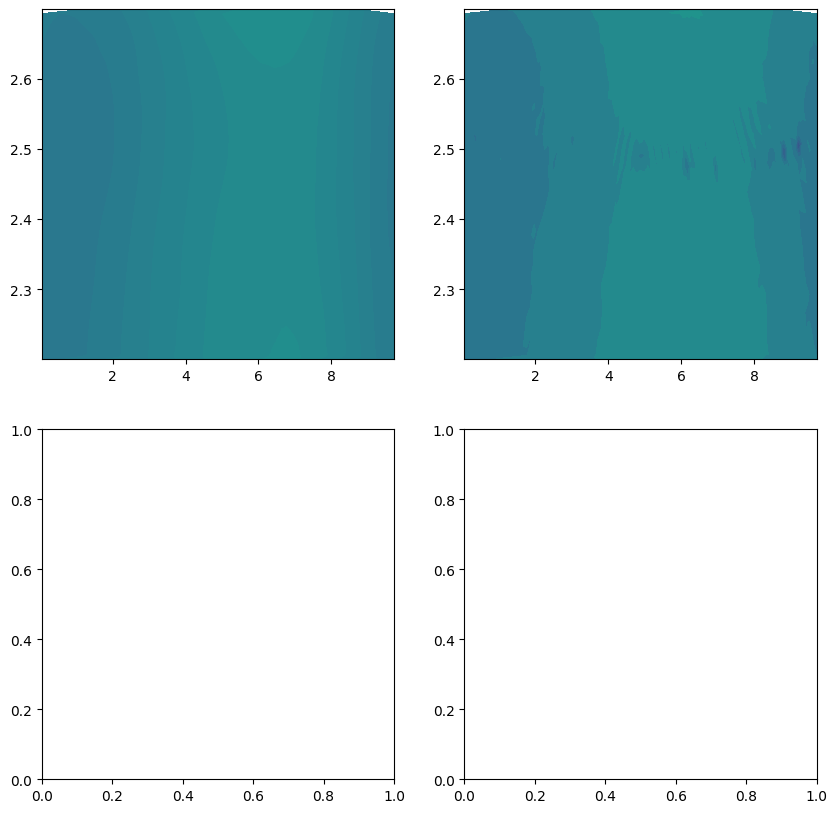

In [12]:
for X, T, y in DataLoader(tDs, shuffle=False, batch_size=tDs.__len__()):
    y_pred_train, gn = model(X,T)
    #nut_L = df['komegasst_nut']*-gn[:,0].detach().numpy()
    #gn2 = gn[:,1:]
    #T = T[:,1:,:]
    b_label = y 
    #b_perp_pred = torch.sum(gn2.view(-1,9,1,1)*torch.ones_like(T)*T,axis=1).detach().numpy()
    #a_perp_pred = b_perp_pred*2*df['DNS_k'].to_numpy()[:,None,None]

se = ((y_pred_train[:,0,0] - b_label[:,0,0])**2 \
    + (y_pred_train[:,0,1] - b_label[:,0,1])**2 \
    + (y_pred_train[:,0,2] - b_label[:,0,2])**2 \
    + (y_pred_train[:,1,1] - b_label[:,1,1])**2 \
    + (y_pred_train[:,1,2] - b_label[:,1,2])**2 \
    + (y_pred_train[:,2,2] - b_label[:,2,2])**2 \
    )/6

print(y_pred_train[50])
print(b_label[50])
print(T[50])
print(np.mean(se.detach().numpy()))
print(np.sqrt(np.mean(se.detach().numpy())))
fig, axs = plt.subplots(nrows=2,ncols=2,figsize=(10,10))
axs[0,0].tricontourf(df_tv['komegasst_C_1'],df_tv['komegasst_C_2'],y[:,0,0].detach().numpy(),vmin=-1/3,vmax=2/3)
axs[0,1].tricontourf(df_tv['komegasst_C_1'],df_tv['komegasst_C_2'],y_pred_train[:,0,0].detach().numpy(),vmin=-1/3,vmax=2/3)

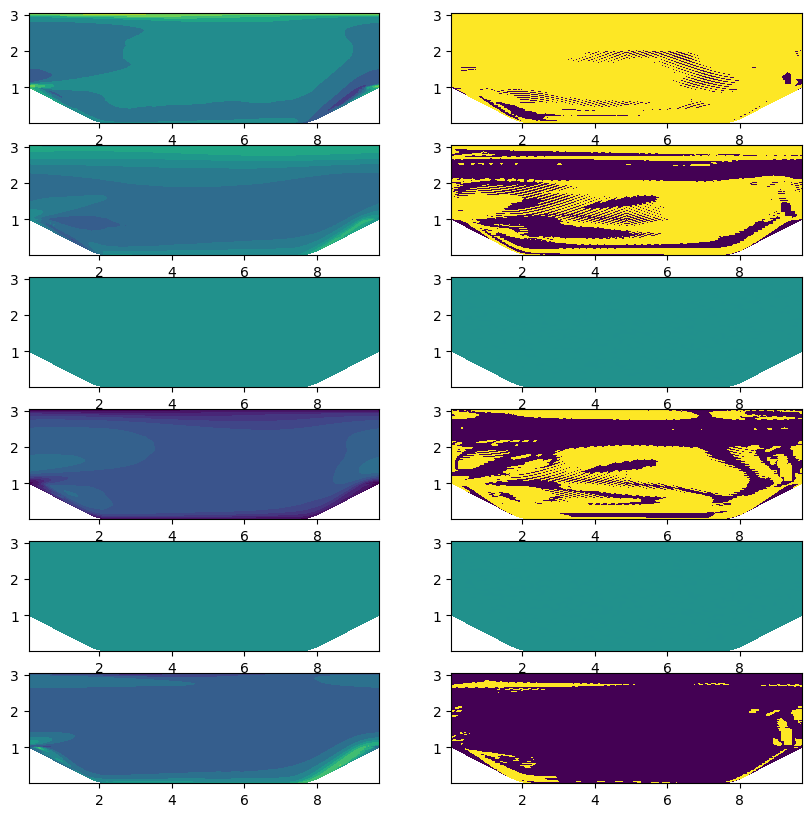

In [23]:
fig, axs = plt.subplots(nrows=6,ncols=2,figsize=(10,10))
axs[0,0].tricontourf(df_test['komegasst_C_1'],df_test['komegasst_C_2'],df_test['DNS_b_11'],vmin=-1/3,vmax=2/3)
axs[0,1].tricontourf(df_test['komegasst_C_1'],df_test['komegasst_C_2'],df_test['pred_b_11_all'],vmin=-1/3,vmax=2/3)

axs[1,0].tricontourf(df_test['komegasst_C_1'],df_test['komegasst_C_2'],df_test['DNS_b_12'],vmin=-1/2,vmax=1/2)
axs[1,1].tricontourf(df_test['komegasst_C_1'],df_test['komegasst_C_2'],df_test['pred_b_12_all'],vmin=-1/2,vmax=1/2)

axs[2,0].tricontourf(df_test['komegasst_C_1'],df_test['komegasst_C_2'],df_test['DNS_b_13'],vmin=-1/2,vmax=1/2)
axs[2,1].tricontourf(df_test['komegasst_C_1'],df_test['komegasst_C_2'],df_test['pred_b_13_all'],vmin=-1/2,vmax=1/2)

axs[3,0].tricontourf(df_test['komegasst_C_1'],df_test['komegasst_C_2'],df_test['DNS_b_22'],vmin=-1/3,vmax=2/3)
axs[3,1].tricontourf(df_test['komegasst_C_1'],df_test['komegasst_C_2'],df_test['pred_b_22_all'],vmin=-1/3,vmax=2/3)

axs[4,0].tricontourf(df_test['komegasst_C_1'],df_test['komegasst_C_2'],df_test['DNS_b_23'],vmin=-1/2,vmax=1/2)
axs[4,1].tricontourf(df_test['komegasst_C_1'],df_test['komegasst_C_2'],df_test['pred_b_23_all'],vmin=-1/2,vmax=1/2)

axs[5,0].tricontourf(df_test['komegasst_C_1'],df_test['komegasst_C_2'],df_test['DNS_b_33'],vmin=-1/3,vmax=2/3)
axs[5,1].tricontourf(df_test['komegasst_C_1'],df_test['komegasst_C_2'],df_test['pred_b_33_all'],vmin=-1/3,vmax=2/3)

for ax in axs.reshape(-1): 
    ax.set_aspect(1)


In [24]:

import sys
sys.path.insert(1, '/home/ryley/WDK/ML/code/data_scripting/')
import dataFoam

In [25]:
import numpy as np
from dataFoam.utilities.foamIO.writeFoam_PHLL import writeFoam_ap_PHLL, writeFoam_nut_L_PHLL, writeFoam_genericscalar_PHLL
from dataFoam.utilities.foamIO.readFoam import get_endtime
import os

endtime = '0'
foamdir = '/home/ryley/WDK/ML/scratch/injection/case_1p2_testing_models'
writeFoam_nut_L_PHLL(os.path.join(foamdir,endtime,'nut_L'),nut_L)
writeFoam_ap_PHLL(os.path.join(foamdir,endtime,'aperp'),a_perp_pred)

Writing nut_L to file /home/ryley/WDK/ML/scratch/injection/case_1p2_testing_models/0/nut_L
Writing aperp to file /home/ryley/WDK/ML/scratch/injection/case_1p2_testing_models/0/aperp


In [26]:
writeFoam_ap_PHLL(os.path.join(foamdir,endtime,'b_pred'),y_pred_test.detach().numpy())

Writing aperp to file /home/ryley/WDK/ML/scratch/injection/case_1p2_testing_models/0/b_pred


In [9]:
writeFoam_ap_PHLL(os.path.join(foamdir,endtime,'b_label'),b_label)

Writing aperp to file /home/ryley/WDK/ML/scratch/injection/case_1p2_testing_models/0/b_label


In [41]:
y_pred_test.shape

torch.Size([14751, 3, 3])